In [65]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv("Downloads\car_evaluation.csv")

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


# Exploratory data analysis

In [5]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [6]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
df.columns=col_names

In [7]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
for col in df.columns:
    print(col,":" ,len(df[col].unique()))
    

buying : 4
maint : 4
doors : 4
persons : 3
lug_boot : 3
safety : 3
class : 4


In [10]:
for col in df.columns:
    print(col, ":",(df[col].value_counts()))

buying : med      432
high     432
low      432
vhigh    431
Name: buying, dtype: int64
maint : med      432
high     432
low      432
vhigh    431
Name: maint, dtype: int64
doors : 3        432
5more    432
4        432
2        431
Name: doors, dtype: int64
persons : more    576
4       576
2       575
Name: persons, dtype: int64
lug_boot : med      576
big      576
small    575
Name: lug_boot, dtype: int64
safety : med     576
high    576
low     575
Name: safety, dtype: int64
class : unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [11]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [12]:
x=df.drop('class',axis=1)
y=df['class']


In [13]:
#splitting the data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [14]:
x_train.shape

(1208, 6)

In [15]:
x_train

,buying,maint,doors,persons,lug_boot,safety
580,high,high,3,4,med,high
1214,med,low,3,2,small,low
1664,low,low,3,more,small,low
661,high,med,2,4,med,high
587,high,high,3,more,med,low
...,...,...,...,...,...,...
835,high,low,4,more,big,high
1216,med,low,3,2,small,high
1653,low,low,3,2,big,med
559,high,high,2,more,small,high


In [16]:
x_test.shape

(519, 6)

In [17]:
y_train.shape

(1208,)

In [18]:
encode=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])

In [19]:
x_train=encode.fit_transform(x_train)
x_test=encode.fit_transform(x_test)

C:\Users\GUDA\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [20]:
x_train.value_counts()

buying  maint  doors  persons  lug_boot  safety
4       4      4      3        3         3         1
2       2      1      3        2         1         1
                                         3         1
                               3         1         1
                                         2         1
                                                  ..
3       3      3      3        1         3         1
                               2         1         1
                               3         1         1
                                         2         1
1       1      1      1        1         1         1
Length: 1208, dtype: int64

In [21]:
encoder=ce.OrdinalEncoder(cols=['class'])
encoder

OrdinalEncoder(cols=['class'])

In [22]:
y_train.dtypes

dtype('O')

In [52]:
for i,d in enumerate(depth):
    cg=DecisionTreeClassifier(criterion='gini',max_depth=8,random_state=3)
    

In [53]:
cg

DecisionTreeClassifier(max_depth=8, random_state=3)

In [54]:
fit=cg.fit(x_train,y_train)

In [55]:
y_hat=cg.predict(x_test)

In [63]:
accuracy=metrics.accuracy_score(y_test,y_hat)
print(accuracy)

0.8921001926782274


In [57]:
cg.score(x_test,y_test)

0.8921001926782274

In [64]:
cg.score(x_train,y_train)

0.9312913907284768

In [72]:
print('classification report test_data:','\n',metrics.classification_report(y_test,y_hat))

classification report test_data: 
               precision    recall  f1-score   support

         acc       0.82      0.75      0.78       116
        good       0.53      0.48      0.50        21
       unacc       0.96      0.97      0.96       358
       vgood       0.62      0.83      0.71        24

    accuracy                           0.89       519
   macro avg       0.73      0.76      0.74       519
weighted avg       0.89      0.89      0.89       519



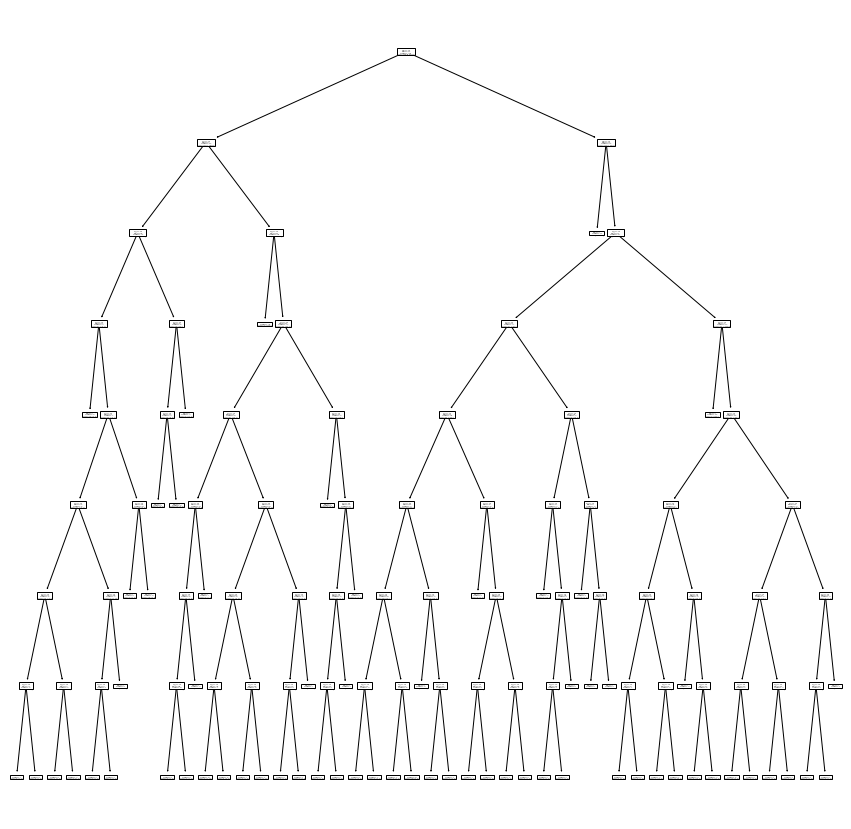

In [31]:
#visualization
plt.figure(figsize=(15,15))
tree.plot_tree(fit)
plt.show()

In [32]:
cls_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=0)
cls_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)

In [33]:
cls_entropy.score(x_test,y_test)

0.9190751445086706

In [34]:
cls_entropy.score(x_train,y_train)

0.9329470198675497

In [35]:
y_pred=cls_entropy.predict(x_test)

In [36]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[ 88  10  15   3]
 [  3  11   0   7]
 [  3   1 354   0]
 [  0   0   0  24]]


In [37]:
for col in df.columns:
    print(col,":",df[col].unique())
    

buying : ['vhigh' 'high' 'med' 'low']
maint : ['vhigh' 'high' 'med' 'low']
doors : ['2' '3' '4' '5more']
persons : ['2' '4' 'more']
lug_boot : ['small' 'med' 'big']
safety : ['med' 'high' 'low']
class : ['unacc' 'acc' 'vgood' 'good']


In [38]:
y.value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [39]:
cls_entropy.predict([[3,4,2,3,1,1]])

array(['acc'], dtype=object)

In [40]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.94      0.76      0.84       116
        good       0.50      0.52      0.51        21
       unacc       0.96      0.99      0.97       358
       vgood       0.71      1.00      0.83        24

    accuracy                           0.92       519
   macro avg       0.78      0.82      0.79       519
weighted avg       0.92      0.92      0.92       519



In [62]:
print(df['class'].value_counts()/df['class'].value_counts().sum()*100)

unacc    70.005790
acc      22.235090
good      3.995368
vgood     3.763752
Name: class, dtype: float64


# over sampling

In [66]:
smote=SMOTE(sampling_strategy='minority')
x_train_s,y_train_s=smote.fit_resample(x_train,y_train)

In [67]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=8)
dt.fit(x_train_s,y_train_s)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [68]:
dt.score(x_test,y_test)

0.9017341040462428

In [71]:
dt.score(x_train_s,y_train_s)

0.9449950445986125

In [69]:
y_pred1=dt.predict(x_test)

In [70]:
print('classification report Test data:','\n',metrics.classification_report(y_test,y_pred1))

classification report Test data: 
               precision    recall  f1-score   support

         acc       0.93      0.73      0.82       116
        good       0.50      0.52      0.51        21
       unacc       0.96      0.97      0.97       358
       vgood       0.56      1.00      0.72        24

    accuracy                           0.90       519
   macro avg       0.74      0.81      0.75       519
weighted avg       0.92      0.90      0.90       519



In [76]:
y_train_s.value_counts()

vgood    851
unacc    851
acc      268
good      48
Name: class, dtype: int64

In [77]:
from imblearn.combine import SMOTETomek

In [113]:
smk=SMOTETomek(random_state=7)
x_smk,y_smk=smk.fit_resample(x_train,y_train)

In [114]:
y_smk.value_counts()

good     851
unacc    851
vgood    851
acc      851
Name: class, dtype: int64

In [115]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=8)
dt1.fit(x_smk,y_smk)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [116]:
y_h=dt1.predict(x_test)

In [117]:
print(metrics.classification_report(y_test,y_h))

              precision    recall  f1-score   support

         acc       0.69      0.75      0.72       116
        good       0.36      0.76      0.48        21
       unacc       0.97      0.83      0.89       358
       vgood       0.57      0.96      0.72        24

    accuracy                           0.82       519
   macro avg       0.65      0.82      0.70       519
weighted avg       0.86      0.82      0.83       519

